In [2]:
import pandas as pd

In [3]:
users_df = pd.read_csv('../data/derived_files/core_users.csv')

In [4]:
users_df.head(5)

,login,id,node_id,avatar_url,url,html_url,followers_url,following_url,gists_url,starred_url,...,hireable,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at,user_query_time
0,Jean-Baptiste-Camps,1204247,MDQ6VXNlcjEyMDQyNDc=,https://avatars.githubusercontent.com/u/120424...,https://api.github.com/users/Jean-Baptiste-Camps,https://github.com/Jean-Baptiste-Camps,https://api.github.com/users/Jean-Baptiste-Cam...,https://api.github.com/users/Jean-Baptiste-Cam...,https://api.github.com/users/Jean-Baptiste-Cam...,https://api.github.com/users/Jean-Baptiste-Cam...,...,NaN,Assoc. Prof. in Computational Philology @chart...,jbcamps,35.0,1.0,65.0,58.0,2011-11-18T11:59:27Z,2022-10-28T11:13:28Z,2022-11-19
1,walshbr,2334220,MDQ6VXNlcjIzMzQyMjA=,https://avatars.githubusercontent.com/u/233422...,https://api.github.com/users/walshbr,https://github.com/walshbr,https://api.github.com/users/walshbr/followers,https://api.github.com/users/walshbr/following...,https://api.github.com/users/walshbr/gists{/gi...,https://api.github.com/users/walshbr/starred{/...,...,NaN,Head of Graduate Programs in the Scholars' Lab...,NaN,64.0,6.0,66.0,9.0,2012-09-12T19:09:35Z,2022-10-19T17:20:38Z,2022-11-19
2,amandavisconti,899033,MDQ6VXNlcjg5OTAzMw==,https://avatars.githubusercontent.com/u/899033...,https://api.github.com/users/amandavisconti,https://github.com/amandavisconti,https://api.github.com/users/amandavisconti/fo...,https://api.github.com/users/amandavisconti/fo...,https://api.github.com/users/amandavisconti/gi...,https://api.github.com/users/amandavisconti/st...,...,NaN,i like websites.,literature_geek,35.0,8.0,110.0,146.0,2011-07-06T19:59:19Z,2022-11-07T12:16:57Z,2022-11-19
3,JonathanReeve,1843676,MDQ6VXNlcjE4NDM2NzY=,https://avatars.githubusercontent.com/u/184367...,https://api.github.com/users/JonathanReeve,https://github.com/JonathanReeve,https://api.github.com/users/JonathanReeve/fol...,https://api.github.com/users/JonathanReeve/fol...,https://api.github.com/users/JonathanReeve/gis...,https://api.github.com/users/JonathanReeve/sta...,...,NaN,"Computational literary analyst, digital humani...",j0_0n,147.0,36.0,225.0,0.0,2012-06-12T18:16:16Z,2022-10-27T11:13:08Z,2022-11-19
4,ZoeLeBlanc,8355129,MDQ6VXNlcjgzNTUxMjk=,https://avatars.githubusercontent.com/u/835512...,https://api.github.com/users/ZoeLeBlanc,https://github.com/ZoeLeBlanc,https://api.github.com/users/ZoeLeBlanc/followers,https://api.github.com/users/ZoeLeBlanc/follow...,https://api.github.com/users/ZoeLeBlanc/gists{...,https://api.github.com/users/ZoeLeBlanc/starre...,...,NaN,Postdoc @Princeton-CDH. PhD in History & forme...,NaN,140.0,45.0,67.0,46.0,2014-08-04T19:05:05Z,2022-09-23T21:51:33Z,2022-11-19


In [5]:
text_df = users_df[['login', 'bio']]

In [6]:
text_df = text_df.dropna()

In [7]:
bios = text_df['bio'].tolist()

text_blob = '. '.join(bios)


In [8]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [9]:
doc = nlp(text_blob)
counts_dict = doc.count_by(spacy.attrs.IDS['POS'])

In [10]:
for pos, count in counts_dict.items():
    human_readable_tag = doc.vocab[pos].text
    print(human_readable_tag, count)

NOUN 3538
PUNCT 3871
PROPN 6852
ADP 1990
SPACE 378
ADV 213
DET 624
PART 132
PRON 384
VERB 804
ADJ 1070
CCONJ 842
X 119
SYM 193
AUX 211
SCONJ 37
NUM 101
INTJ 25


In [11]:
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
# Import package
import matplotlib.pyplot as plt# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [12]:
%matplotlib inline

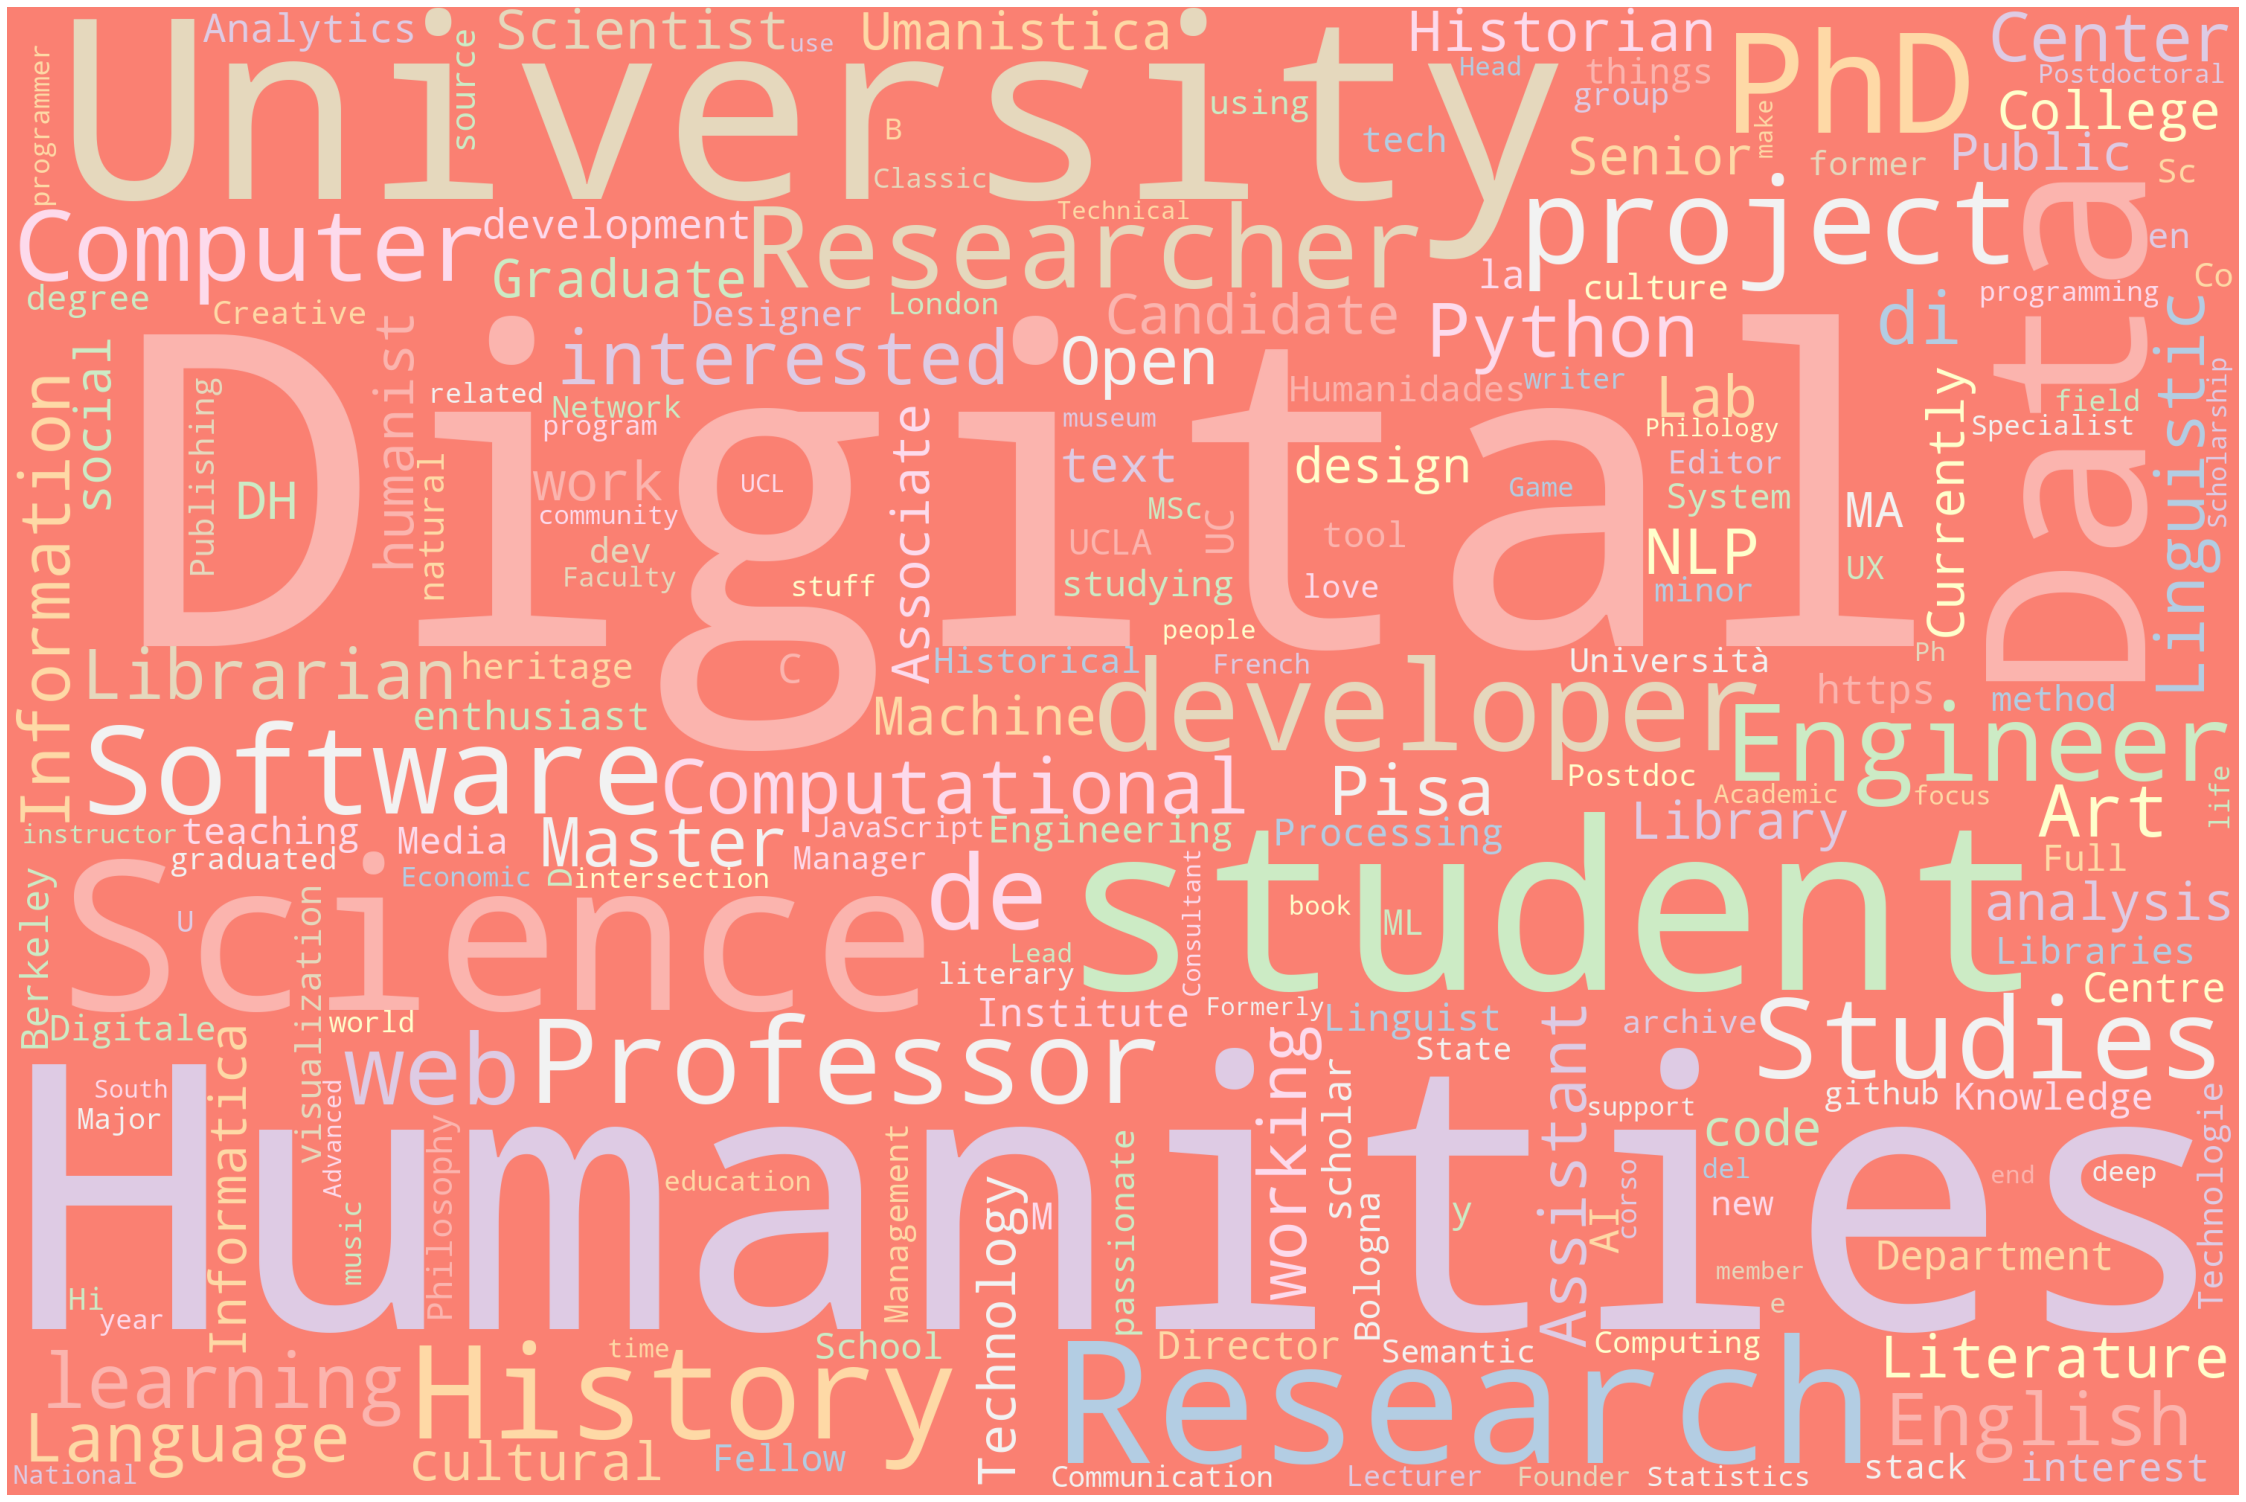

In [13]:
from wordcloud import WordCloud, STOPWORDS

# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text_blob)

# Plot
plot_cloud(wordcloud)